Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
df = pd.read_csv("internship_fit_predictor_250_dataset.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Name,GPA,Skills,Projects,Preferred Domain,Certifications,Internships Completed,Hackathon Participation,Github Profile Score (/10),Selected
1,Harsh,7.22,"R, Statistics",IoT Home Automation,Backend,Git/GitHub,2,Yes,4.8,Yes
2,Ankit,6.81,"Java, OOP",Health Data Analysis,Mobile Dev,Udemy Web Dev,1,No,7.4,Yes
3,Pranav,8.59,"C++, DSA",Sales Dashboard,Mobile Dev,NPTEL AI,1,Yes,9.7,Yes
4,Tara,8.69,"C, Embedded",Credit Scoring,Data Science,Google Data Cert,1,No,6.3,Yes


Data Cleaning 

In [89]:
df.info()
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       251 non-null    object
 1   1       251 non-null    object
 2   2       251 non-null    object
 3   3       251 non-null    object
 4   4       251 non-null    object
 5   5       251 non-null    object
 6   6       251 non-null    object
 7   7       251 non-null    object
 8   8       251 non-null    object
 9   9       251 non-null    object
dtypes: object(10)
memory usage: 19.7+ KB

Missing values:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


So there are no missing Values !

Dropping Unnecesseary columns 

In [90]:
df.drop(columns=[0,1], inplace=True)
df.head()

,2,3,4,5,6,7,8,9
0,Skills,Projects,Preferred Domain,Certifications,Internships Completed,Hackathon Participation,Github Profile Score (/10),Selected
1,"R, Statistics",IoT Home Automation,Backend,Git/GitHub,2,Yes,4.8,Yes
2,"Java, OOP",Health Data Analysis,Mobile Dev,Udemy Web Dev,1,No,7.4,Yes
3,"C++, DSA",Sales Dashboard,Mobile Dev,NPTEL AI,1,Yes,9.7,Yes
4,"C, Embedded",Credit Scoring,Data Science,Google Data Cert,1,No,6.3,Yes


In [91]:
def Changes(a):
    if a=="Yes":
        return 1
    return 0

In [92]:
df[7] = df[7].apply(Changes)
df[9] = df[9].apply(Changes)
df.head()

,2,3,4,5,6,7,8,9
0,Skills,Projects,Preferred Domain,Certifications,Internships Completed,0,Github Profile Score (/10),0
1,"R, Statistics",IoT Home Automation,Backend,Git/GitHub,2,1,4.8,1
2,"Java, OOP",Health Data Analysis,Mobile Dev,Udemy Web Dev,1,0,7.4,1
3,"C++, DSA",Sales Dashboard,Mobile Dev,NPTEL AI,1,1,9.7,1
4,"C, Embedded",Credit Scoring,Data Science,Google Data Cert,1,0,6.3,1


How many students participated in hackathons

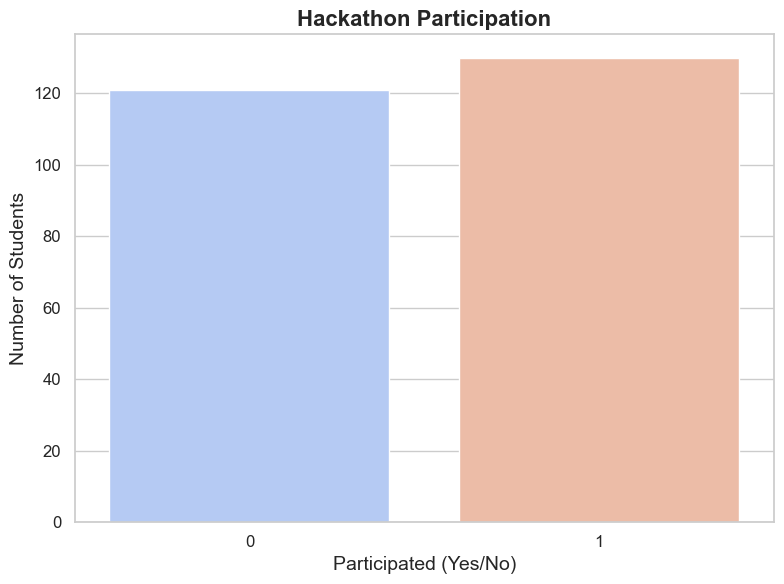

In [93]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x=df[7], hue=df[7], palette="coolwarm", legend=False)

plt.title("Hackathon Participation", fontsize=16, fontweight='bold')
plt.xlabel("Participated (Yes/No)", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Preferred Domain Distribution

C:\Users\rudra\AppData\Local\Temp\ipykernel_9484\497187297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[4], palette="pastel", hue=None, legend=False)


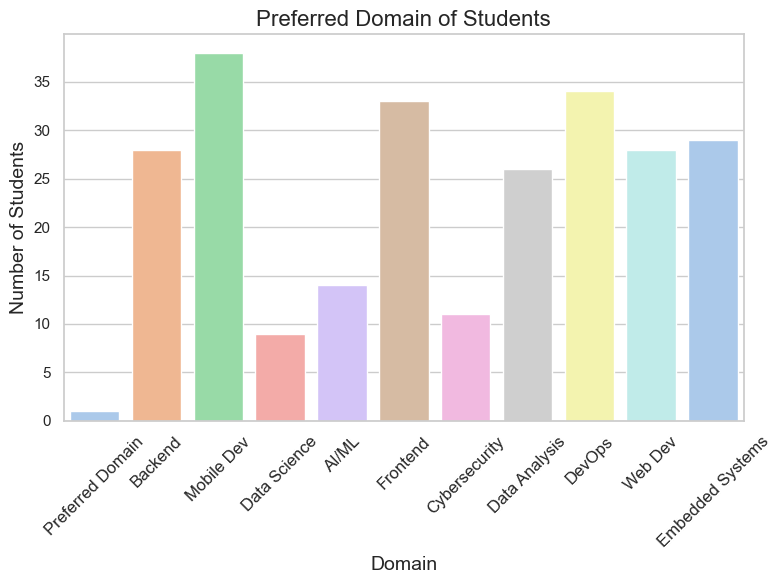

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df[4], palette="pastel", hue=None, legend=False)
plt.title("Preferred Domain of Students", fontsize=16)
plt.xlabel("Domain", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


GitHub Score vs GPA

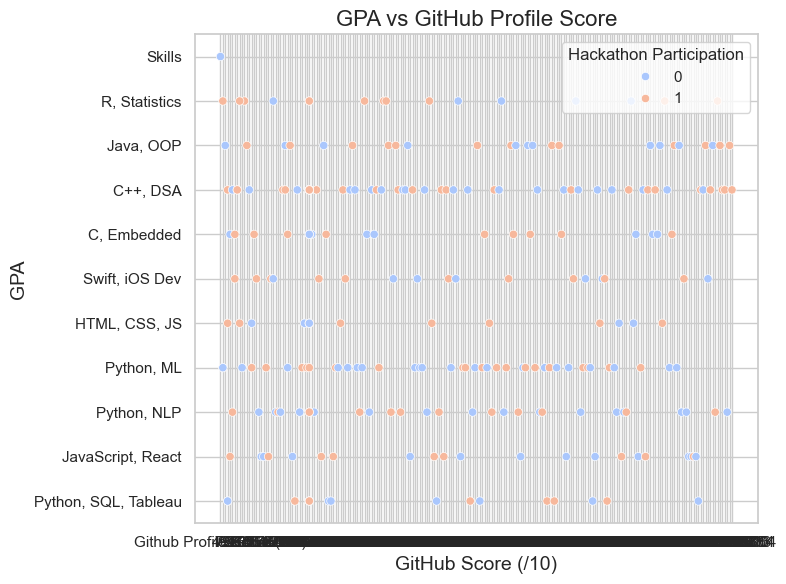

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[8], y=df[2], hue=df[7], palette="coolwarm")
plt.title("GPA vs GitHub Profile Score", fontsize=16)
plt.xlabel("GitHub Score (/10)", fontsize=14)
plt.ylabel("GPA", fontsize=14)
plt.legend(title="Hackathon Participation")
plt.tight_layout()
plt.show()


Certifications Distribution

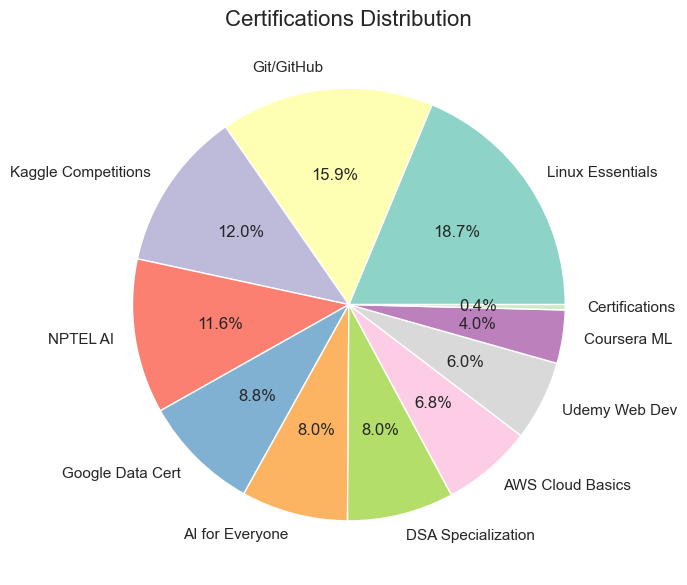

In [96]:
cert_counts = df[5].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(cert_counts, labels=cert_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Certifications Distribution", fontsize=16)
plt.tight_layout()
plt.show()


Machine Learning 

In [97]:
df = df.drop(index=0).reset_index(drop=True)
df.head()

,2,3,4,5,6,7,8,9
0,"R, Statistics",IoT Home Automation,Backend,Git/GitHub,2,1,4.8,1
1,"Java, OOP",Health Data Analysis,Mobile Dev,Udemy Web Dev,1,0,7.4,1
2,"C++, DSA",Sales Dashboard,Mobile Dev,NPTEL AI,1,1,9.7,1
3,"C, Embedded",Credit Scoring,Data Science,Google Data Cert,1,0,6.3,1
4,"C++, DSA",Sales Dashboard,Mobile Dev,NPTEL AI,1,0,9.6,1


In [98]:
df.columns = [
    "GPA",
    "Skills",
    "Preferred Domain",
    "Certifications",
    "Internships Completed",
    "Hackathon Participation",
    "GitHub_Profile_Score",
    "Selected"
]
df.head()

,GPA,Skills,Preferred Domain,Certifications,Internships Completed,Hackathon Participation,GitHub_Profile_Score,Selected
0,"R, Statistics",IoT Home Automation,Backend,Git/GitHub,2,1,4.8,1
1,"Java, OOP",Health Data Analysis,Mobile Dev,Udemy Web Dev,1,0,7.4,1
2,"C++, DSA",Sales Dashboard,Mobile Dev,NPTEL AI,1,1,9.7,1
3,"C, Embedded",Credit Scoring,Data Science,Google Data Cert,1,0,6.3,1
4,"C++, DSA",Sales Dashboard,Mobile Dev,NPTEL AI,1,0,9.6,1


 Feature Scaling (for  GitHub Score)

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['GitHub_Profile_Score']] = scaler.fit_transform(df[['GitHub_Profile_Score']])


Train Test and Split

In [100]:
from sklearn.model_selection import train_test_split

X = df.drop('Selected', axis=1)  # Features
y = df['Selected']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()


,GPA,Skills,Preferred Domain,Certifications,Internships Completed,Hackathon Participation,GitHub_Profile_Score
132,"Python, SQL, Tableau",IoT Home Automation,DevOps,Linux Essentials,0,0,0.449599
225,"Java, OOP",Health Data Analysis,Mobile Dev,Udemy Web Dev,1,1,-0.733838
238,"Java, OOP",Health Data Analysis,Cybersecurity,Linux Essentials,0,1,1.284919
119,"Python, ML",Credit Scoring,DevOps,Git/GitHub,1,0,1.163907
136,"Python, NLP",Credit Scoring,DevOps,Google Data Cert,1,0,1.346635


Model training using Random Forest

In [101]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Create dict to hold encoders
encoders = {}

# Encode categorical columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        encoders[col] = LabelEncoder()
        X_train[col] = encoders[col].fit_transform(X_train[col])
        X_test[col] = encoders[col].transform(X_test[col])

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)





RandomForestClassifier()

In [102]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1])

Evaluate Model Performance

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Classification report (includes precision, recall, f1-score)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.7

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.46      0.44        13
           1       0.81      0.78      0.79        37

    accuracy                           0.70        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.71      0.70      0.70        50


🧩 Confusion Matrix:
 [[ 6  7]
 [ 8 29]]


Feature Importance

C:\Users\rudra\AppData\Local\Temp\ipykernel_9484\4061479316.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
C:\Users\rudra\AppData\Local\Temp\ipykernel_9484\4061479316.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


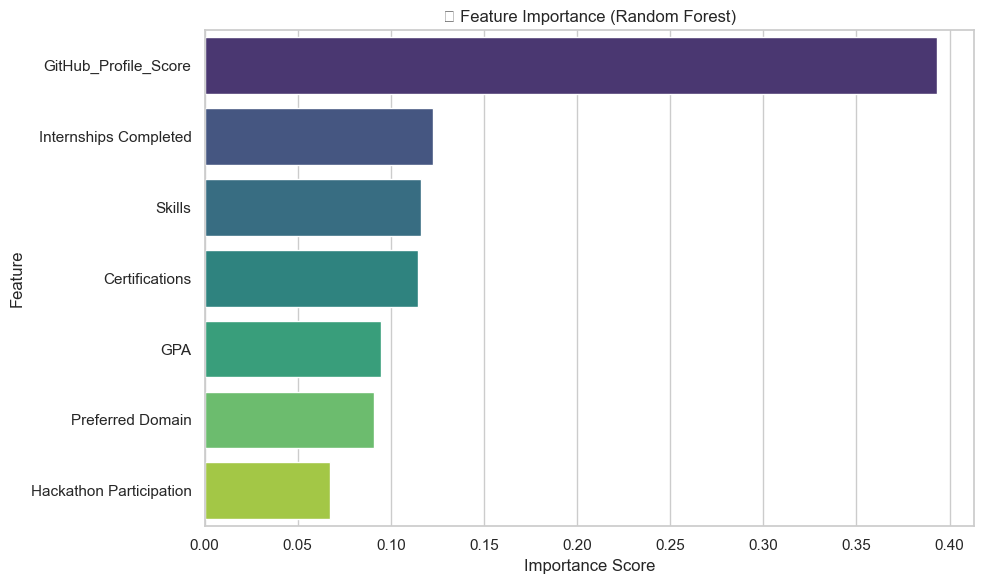

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('📊 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Predict for new Student

In [109]:
# Create new student input
new_student = pd.DataFrame([{
    'GPA': 8.2,
    'Skills': 'Python',  # ⚠️ Use a value seen during training
    'Preferred Domain': 'Data Science',
    'Certifications': 'Coursera ML',
    'Internships Completed': 1,
    'Hackathon Participation': 'Yes',
    'GitHub_Profile_Score': 7
}])

# Function to map Yes/No
def changes(a):
    if a == "Yes":
        return 1
    return 0

# Apply Yes/No transformation
new_student["Hackathon Participation"] = new_student["Hackathon Participation"].apply(changes)

# Encode using same encoders
for col in new_student.columns:
    if new_student[col].dtype == 'object' and col in encoders:
        # Only encode if the value is known to the encoder
        new_student[col] = new_student[col].apply(
            lambda x: encoders[col].transform([x])[0] if x in encoders[col].classes_ else np.nan
        )

# Drop any rows with unknown labels (just in case)
new_student = new_student.dropna()

# Predict
if not new_student.empty:
    prediction = model.predict(new_student)
    print("Prediction (1 = Selected, 0 = Not Selected):", prediction[0])
else:
    print("⚠️ Prediction could not be made: unknown label found in input.")


⚠️ Prediction could not be made: unknown label found in input.
